# **TECH CHALENGE 2**
 **Modelo preditivo bolsa de valores(IBOVESPA)**

 **criação de uma série temporal que preveja diariamente o fechamento da base**

  **Acuracidade adequada (acima de 70%)**

   **Fonte/base de dados: https://br.investing.com/indices/bovespa-historical-data**

**Nome: Jhonny Brasiliano da Silva - rm359212**


## **Introdução/descrição**
### **Base de Dados**

**A base de dados possui 246 linhas e 7 colunas, colunas estas:**:

Data = (em dias) de cada coleta de dados.

Último = Pontos de fechamento no dia.

Abertura = Pontos de abertura no dia.

Máxima = Pontos máximos no dia.

Mínima = Pontos mínimos no dia.

Vol. = Volume de negociações no dia, em bilhões/milhões

Var% -> Variação percentual, é a diferença entre o Último e a Abertura dividida pelo Último, multiplicado por 100.

**Em minha predição, utilizei a variável Último como a preditora da série.**

# **IMPORTANDO AS BIBLIOTECAS QUE IREMOS TRABALHAR**

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import sklearn as sns

# **Fazendo a primeira análise exploratória dos dados (AED)**

In [66]:
dados = pd.read_csv('/content/Dados Históricos - Ibovespa.csv', sep=',')

In [67]:
dados.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,14.01.2025,119.299,119.007,119.451,118.223,"9,35M","0,25%"
1,13.01.2025,119.007,118.856,119.729,118.743,"8,16M","0,13%"
2,10.01.2025,118.856,119.781,120.052,118.732,"9,26B","-0,77%"
3,09.01.2025,119.781,119.625,120.145,119.502,"6,61B","0,13%"
4,08.01.2025,119.625,121.160,121.160,119.351,"10,23B","-1,27%"


In [68]:
#ultimos valores em nossa base de dados.
dados.tail()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
241,26.01.2024,128.967,128.196,129.252,127.869,"8,51M","0,62%"
242,25.01.2024,128.169,127.815,128.697,127.803,"8,76M","0,28%"
243,24.01.2024,127.816,128.275,129.446,127.680,"8,82M","-0,35%"
244,23.01.2024,128.263,126.612,128.331,126.612,"9,37M","1,31%"
245,22.01.2024,126.602,127.636,127.843,125.876,"9,51M","-0,81%"


In [69]:
#verificando o tamanho da nossa base de dados
dados.shape

(246, 7)

In [70]:
dados.describe()

,Último,Abertura,Máxima,Mínima
count,246.000000,246.000000,246.000000,246.000000
mean,127.791065,127.824931,128.537346,127.102236
std,4.131635,4.095590,4.096834,4.105251
min,118.533000,118.534000,119.451000,118.223000
25%,125.714500,125.869750,126.558500,125.083750
50%,127.810000,127.812000,128.554500,127.223500
75%,130.022000,130.024250,130.620250,129.353750
max,137.344000,137.349000,137.469000,136.664000


In [71]:
#verificando se possuimos valores nulos
dados.isnull().sum()

,0
Data,0
Último,0
Abertura,0
Máxima,0
Mínima,0
Vol.,0
Var%,0


In [72]:
# Limapndo dados nulos:
dados = dados.dropna()

In [73]:
#verificando os tipos de dados que nossa base possui.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      246 non-null    object 
 1   Último    246 non-null    float64
 2   Abertura  246 non-null    float64
 3   Máxima    246 non-null    float64
 4   Mínima    246 non-null    float64
 5   Vol.      246 non-null    object 
 6   Var%      246 non-null    object 
dtypes: float64(4), object(3)
memory usage: 13.6+ KB


In [74]:
#transformando a coluna data em datatime
dados['Data'] = pd.to_datetime(dados['Data'], format="%d.%m.%Y")

# **PLOTANDO OS DADOS E CONHECENDO ELES UM POUCO MAIS**

**Plotando os valores para saber a média, máxima e Abertura, e como estes dados se comportaram durante quase um ano.**

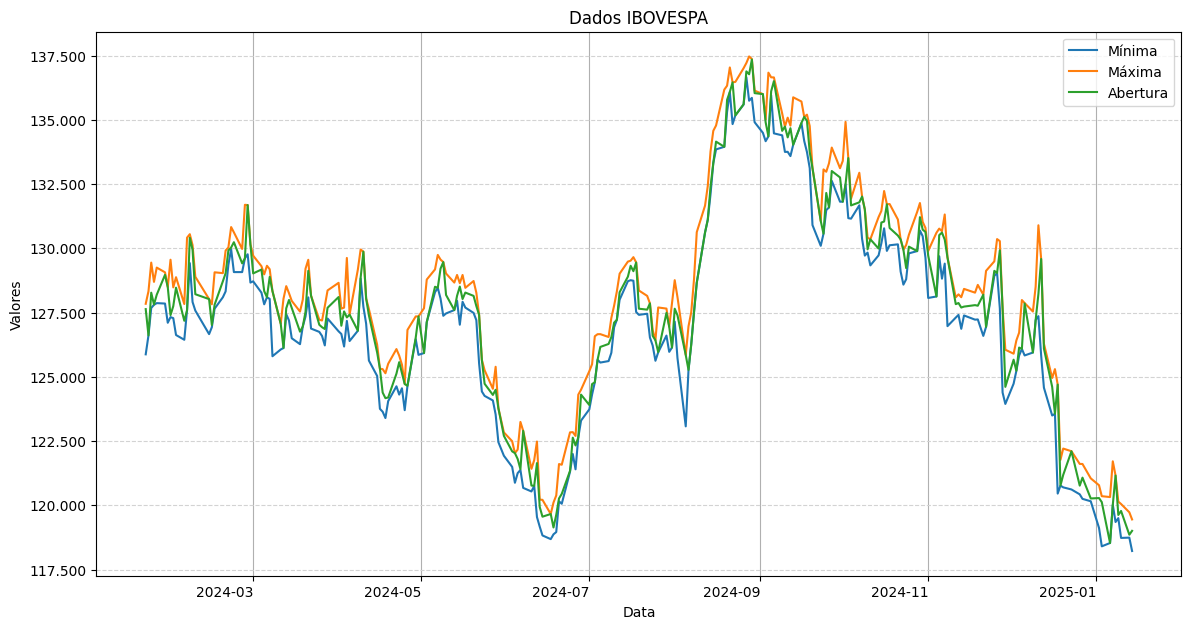

In [75]:
import matplotlib.ticker as ticker
axis=dados.plot(x='Data', y=(['Mínima', 'Máxima', 'Abertura']), figsize=(14,8))
plt.xticks(rotation=0)
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.3f}"))
plt.title("Dados IBOVESPA")
plt.xlabel("Data")
plt.ylabel('Valores')
plt.grid(axis = 'x')
plt.grid(axis = 'y', linestyle='--', color ='lightgray')
plt.legend()
plt.show()

## **plotando um boxplot, colocando um filtro do dia 01/11/2024 até o dia 14/01/2025.**

In [76]:
#Plotando um boxplot e colocando um filtro de 75 dias, verificando se possuimos outliers durante este período de tempo
data_inicio = '2024-11-01'
data_fim = '2025-01-14'

In [77]:
dados_filtrados = dados[(dados['Data'] >=data_inicio) & (dados['Data'] <= data_fim)]

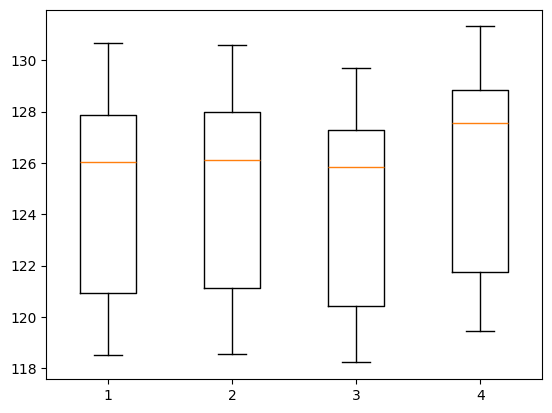

In [78]:
dados_numericos = dados_filtrados[['Último', 'Abertura', 'Mínima', 'Máxima']]
plt.boxplot(dados_numericos.values)
plt.show()

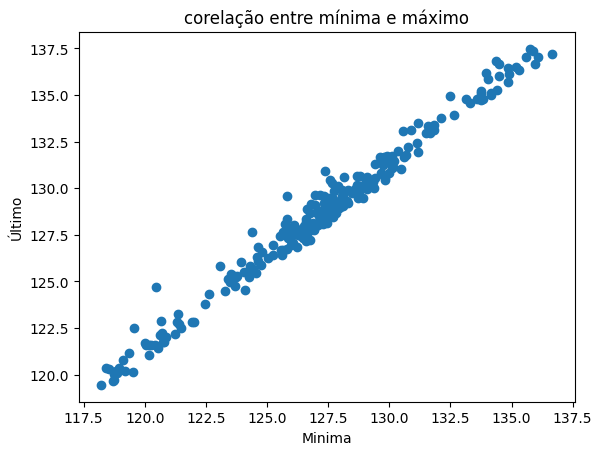

In [79]:
#fazendo um scatter plot e verificando se ainda possuimos outliers, scatter plot consegue identificar valores discrepantes ao mesmo tempo que mostra a relação entre suas variáveis.
plt.scatter(dados['Mínima'], dados['Máxima'])
plt.xlabel('Minima')
plt.ylabel('Último')
plt.title('corelação entre mínima e máximo')
plt.show()

**criando um scatterplot e verificando a relação entre as variáveis e se elas possuem outliers**

## **Diferenciando nossa base de dados.**

In [80]:
#fazendo a diferenciação dos nossos dados.
dados3 = dados[['Mínima','Máxima', 'Abertura', "Último"]]
dados2 = np.diff(dados3)

{'whiskers': [<matplotlib.lines.Line2D at 0x7bab04cdf150>,
 'caps': [<matplotlib.lines.Line2D at 0x7bab04cde0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bab04c94250>,
 'medians': [<matplotlib.lines.Line2D at 0x7bab04cd11d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7bab04cd0dd0>,
 'means': []}

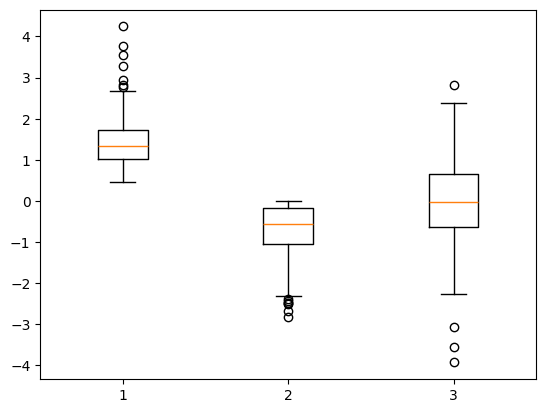

In [81]:
#quando plotamos o boxplot com as colunas diferenciadas verificamos que possuimos outliers.
plt.boxplot(dados2)

**Quando plotamos o boxplot e o scatterplot, não encontramos nenhum outlier em nossos dados, porém quando diferenciamos os nossos dados, vimos alguns outliers nela, séries não estácionárias tem essa tendência de mascarar alguns dados.**

# **Decomposição aditiva**

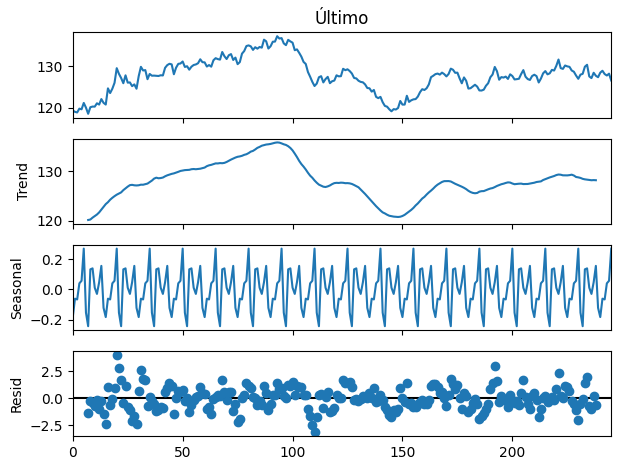

In [82]:
 # A decomposição aditiva verifica como nossa série se comportou durante um determinado período de tempo, selecionando uma variável preditora(Último) para fazer essa verificação.
resultado = seasonal_decompose(dados["Último"], model="additive", period=15)

# Plot da decomposição
resultado.plot()
plt.show()

## **Teste de Dickey-Fuller Aumentado (ADF), verificando se a base de dados é estácionária ou não.**

In [83]:
resultado_adf = adfuller(dados["Último"])
print(f"Estatística ADF: {resultado_adf[0]}")
print(f"Valor-p: {resultado_adf[1]}")
for key, value in resultado_adf[4].items():
    print(f"Valor Crítico {key}: {value}")

# Interpretação
if resultado_adf[1] < 0.05:
    print("A série é estacionária.")
else:
    print("A série não é estacionária.")

Estatística ADF: -2.520237978707144
Valor-p: 0.1106275331283258
Valor Crítico 1%: -3.4573260719088132
Valor Crítico 5%: -2.873410402808354
Valor Crítico 10%: -2.573095980841316
A série não é estacionária.


**Conclusão: Se o valor-p for maior que 0.05, não rejeitamos a hipótese nula, indicando que a série não é estacionária.**

# **Estacionarização da Série Temporal**

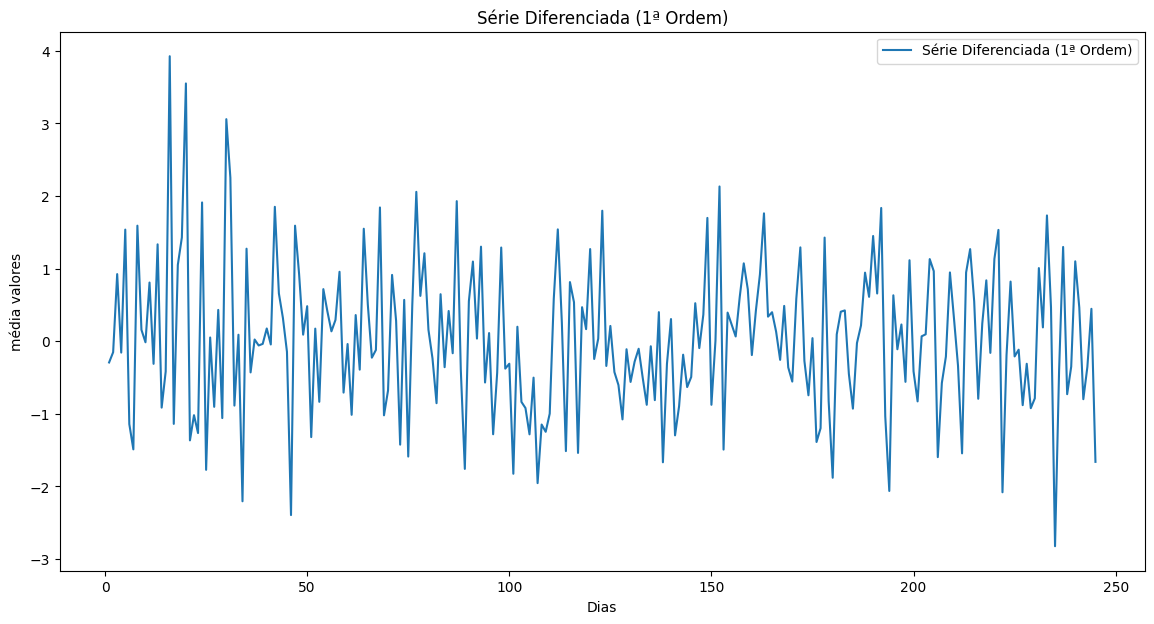

In [84]:
# fazendo a diferenciação de primeira ordem
dados["Último_diff"] = dados["Último"] - dados["Último"].shift(1)
dados["Último_diff"] = dados["Último_diff"].dropna()

# Plot da série diferenciada
plt.figure(figsize=(14, 7))
plt.plot(dados.index, dados["Último_diff"], label="Série Diferenciada (1ª Ordem)")
plt.title("Série Diferenciada (1ª Ordem)")
plt.xlabel("Dias")
plt.ylabel("média valores")
plt.legend()
plt.show()

**quando fizemos a diferenciação para a estacionalização da série, a coluna Último_diff veio com alguns valores nulos**

In [85]:
#verificando valores nulos
dados.isnull().sum()

,0
Data,0
Último,0
Abertura,0
Máxima,0
Mínima,0
Vol.,0
Var%,0
Último_diff,1


In [86]:
#Printando a coluna
print(dados['Último_diff'])

0        NaN
1     -0.292
2     -0.151
3      0.925
4     -0.156
       ...  
241    0.464
242   -0.798
243   -0.353
244    0.447
245   -1.661
Name: Último_diff, Length: 246, dtype: float64


In [87]:
# Neste comando preenchemos valores faltantes com valores anteriores, assim preenchendo lacunas relacionados a dias em que a bolsa de valores não funcionou(feriados, finais de semana) e valores nulos.
dados["Último_diff"] = dados["Último_diff"].fillna(method='ffill')
# Preenchimento com a média
dados["Último_diff"] = dados["Último_diff"].fillna(dados["Último_diff"].mean())

<ipython-input-87-295d35e10164>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dados["Último_diff"] = dados["Último_diff"].fillna(method='ffill')


In [88]:
# verificando valores nulos
print(dados["Último_diff"].isna().sum())
print(np.isinf(dados["Último_diff"]).sum())

0
0


In [89]:
# Substituindo valores infinitos
dados["Último_diff"] = dados["Último_diff"].replace([float('inf'), float('-inf')], np.nan)
# Removendo valores nulos
dados["Último_diff"] = dados["Último_diff"].dropna()


# **Teste ADF**

In [90]:
# Teste ADF
resultado_adf = adfuller(dados["Último_diff"])
print(f"Estatística ADF: {resultado_adf[0]}")
print(f"Valor-p: {resultado_adf[1]}")
for key, value in resultado_adf[4].items():
    print(f"Valor Crítico {key}: {value}")

# Interpretação
if resultado_adf[1] < 0.05:
    print("A série é estacionária.")
else:
    print("A série não é estacionária.")

Estatística ADF: -16.332755819916017
Valor-p: 3.049478319797887e-29
Valor Crítico 1%: -3.4573260719088132
Valor Crítico 5%: -2.873410402808354
Valor Crítico 10%: -2.573095980841316
A série é estacionária.


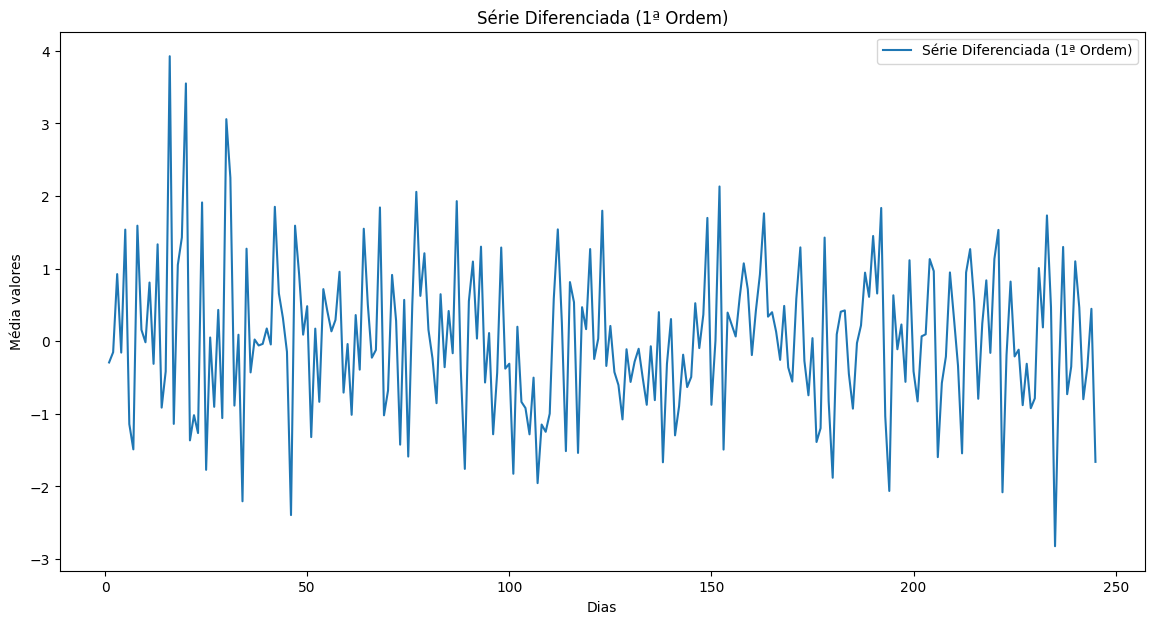

In [91]:
# Plot da série diferenciada
dados["Último_diff"] = dados["Último"] - dados["Último"].shift(1)
dados["Último_diff"] = dados["Último_diff"].dropna()
plt.figure(figsize=(14, 7))
plt.plot(dados.index, dados["Último_diff"], label="Série Diferenciada (1ª Ordem)")
plt.title("Série Diferenciada (1ª Ordem)")
plt.xlabel("Dias")
plt.ylabel("Média valores")
plt.legend()
plt.show()

# **Funções de Autocorrelação (ACF) e Autocorrelação Parcial (PACF)**

In [92]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

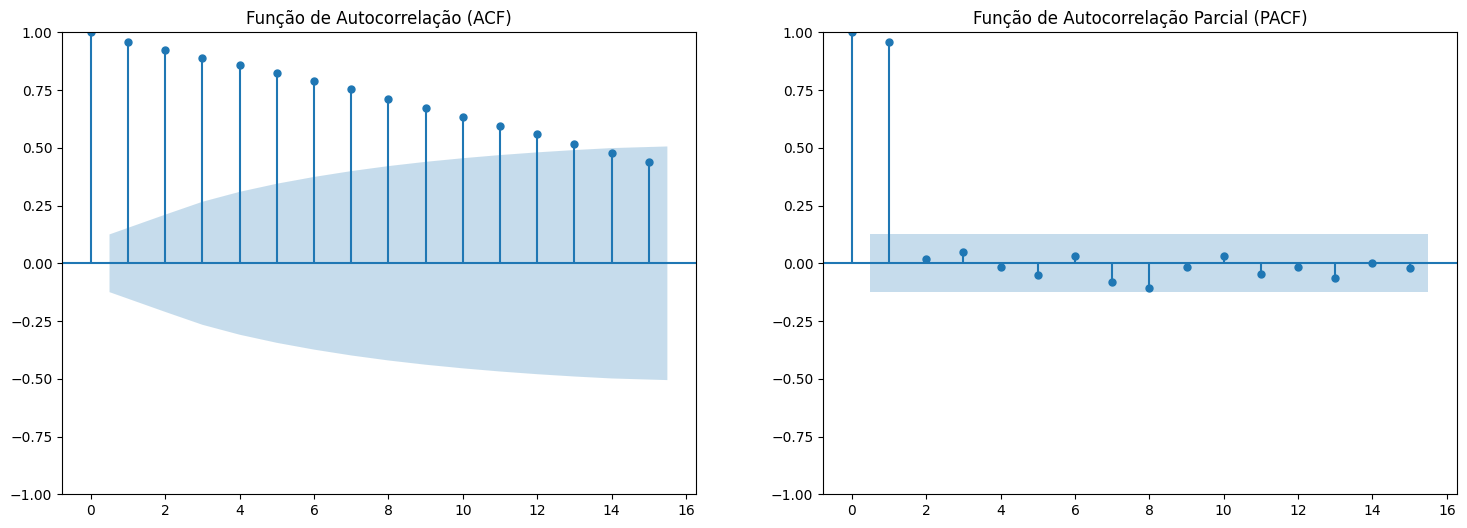

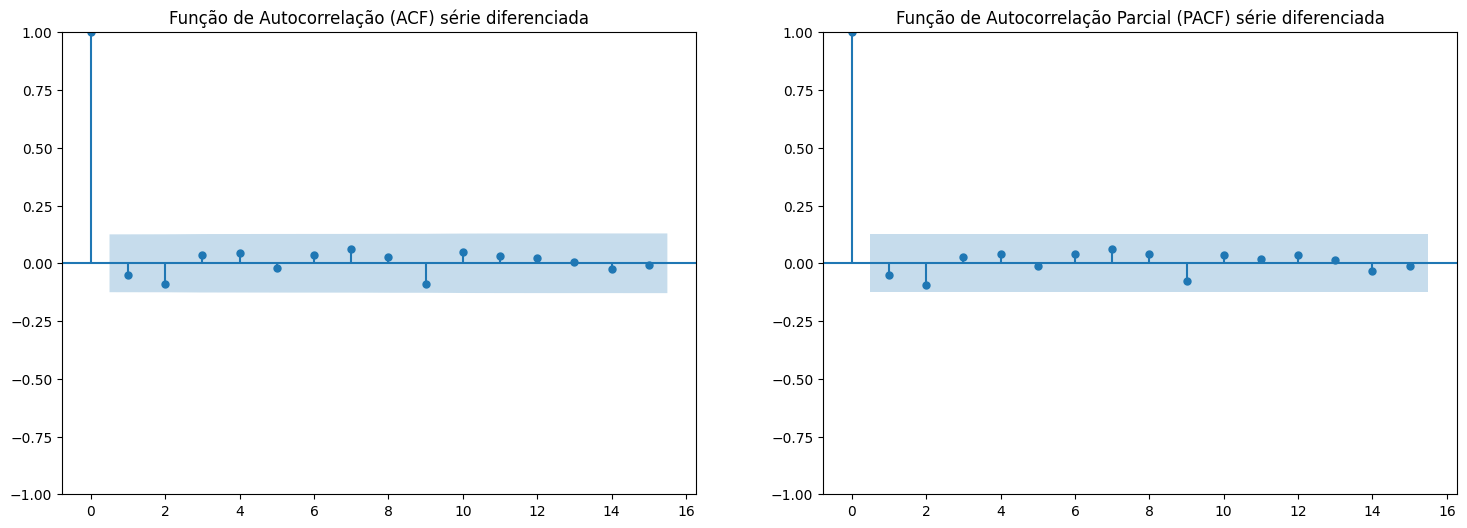

In [93]:
 # Plot da ACF e PACF da série
plt.figure(figsize=(18, 6))
plt.subplot(121)
plot_acf(dados["Último"].dropna(), ax=plt.gca(), lags=15)
plt.title("Função de Autocorrelação (ACF)")
plt.subplot(122)
plot_pacf(dados["Último"].dropna(), ax=plt.gca(), lags=15)
plt.title("Função de Autocorrelação Parcial (PACF)")

#auto correlação parcial com a série diferenciada
plt.figure(figsize=(18, 6))
plt.subplot(121)
plot_acf(dados["Último_diff"].dropna(), ax=plt.gca(), lags=15)
plt.title("Função de Autocorrelação (ACF) série diferenciada")
plt.subplot(122)
plot_pacf(dados["Último_diff"].dropna(), ax=plt.gca(), lags=15)
plt.title("Função de Autocorrelação Parcial (PACF) série diferenciada")
plt.show()

In [94]:
# Ajuste do modelo ARIMA(p, d, q)
p = 1
q = 60
d = 1

In [95]:
# Suposição: p=5, d=1, q=2 (com base na análise dos gráficos ACF e PACF)
model_arima = ARIMA(dados["Último"], order=(p, d, q))
resultado_arima = model_arima.fit()

# Resumo do modelo
print(resultado_arima.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                 Último   No. Observations:                  246
Model:                ARIMA(1, 1, 60)   Log Likelihood                -321.469
Date:                Tue, 21 Jan 2025   AIC                            766.938
Time:                        05:17:12   BIC                            984.016
Sample:                             0   HQIC                           854.356
                                - 246                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3200     18.599      0.017      0.986     -36.134      36.774
ma.L1         -0.3108     18.629     -0.017      0.987     -36.823      36.201
ma.L2         -0.1362      0.501     -0.272      0.7

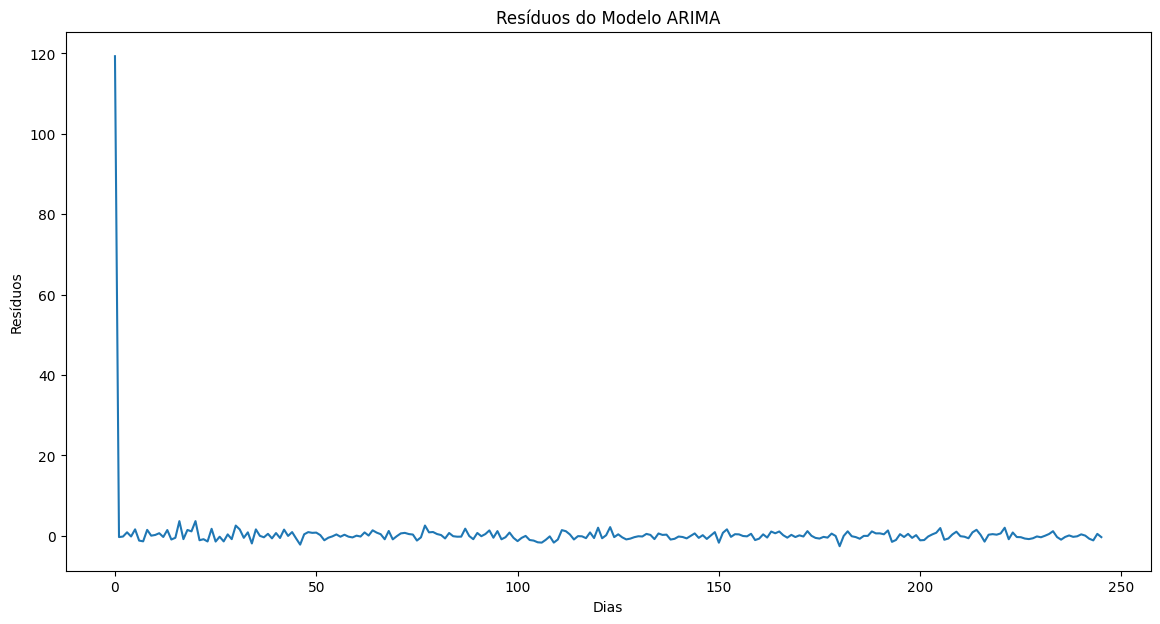

,lb_stat,lb_pvalue
15,0.22141,1.0


In [96]:
 #Resíduos do modelo ARIMA
resid_arima = resultado_arima.resid

# Plot dos resíduos
plt.figure(figsize=(14, 7))
plt.plot(resid_arima)
plt.title("Resíduos do Modelo ARIMA")
plt.xlabel("Dias")
plt.ylabel("Resíduos")
plt.show()

# Teste de Ljung-Box
lb_test = acorr_ljungbox(resid_arima, lags=[15], return_df=True)
lb_test

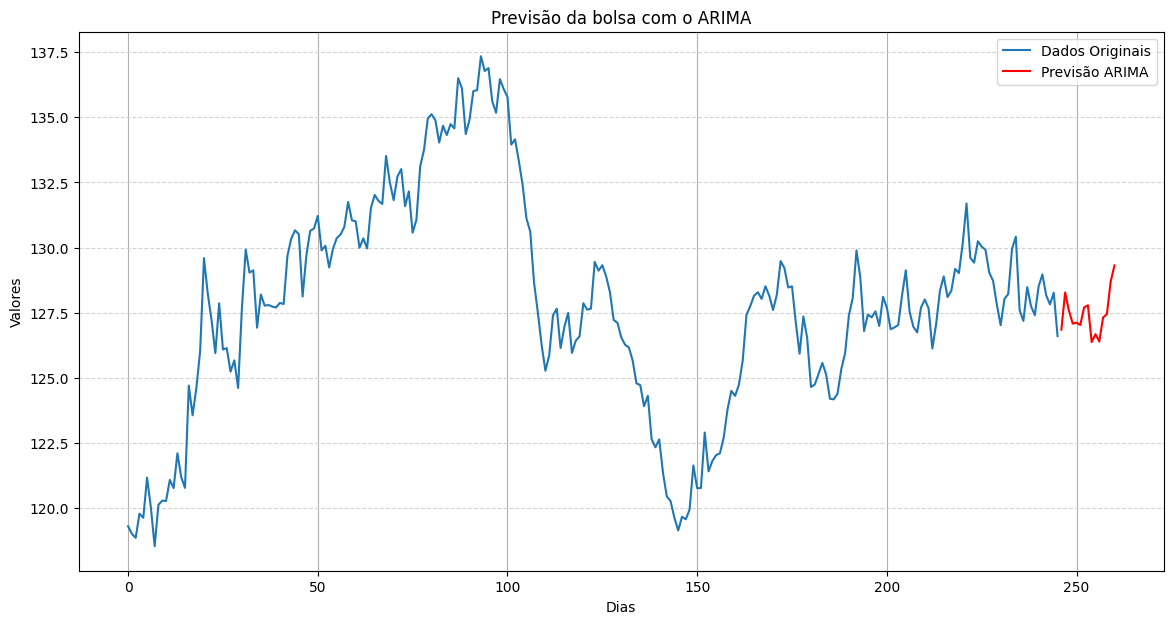

In [97]:
# Previsão dos próximos 15 dias
forecast_arima = resultado_arima.forecast(steps=15)

# Plot das previsões
plt.figure(figsize=(14, 7))
plt.plot(dados["Último"].iloc[-350:], label="Dados Originais")
plt.plot(forecast_arima.index, forecast_arima, color="red", label="Previsão ARIMA")
plt.title("Previsão da bolsa com o ARIMA")
plt.xlabel("Dias")
plt.ylabel("Valores")
plt.xlabel("Dias")
plt.grid(axis = 'x')
plt.grid(axis = 'y', linestyle='--', color ='lightgray')
plt.legend()
plt.show()

# **Modelos de Predição**

# **ARIMA**

In [98]:
# Divisão dos dados para os ultimos 15 dias da base
train_data = dados["Último"][:-15]
test_data = dados["Último"][-15:]

In [99]:
#dados de treino modelo arima
train_data.shape

(231,)

In [100]:
model_arima_train = ARIMA(train_data, order=(p, d, q))
resultado_arima_train = model_arima_train.fit()
forecast_arima_train = resultado_arima_train.forecast(steps=15)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [101]:
#mae arima
mae_arima = mean_absolute_error(test_data, forecast_arima_train)
print(f"MAE ARIMA: {mae_arima}")

MAE ARIMA: 1.4657667860326284


In [102]:
#rmse_arima
rmse_arima = mean_squared_error(test_data, forecast_arima_train)

In [103]:
#rmse_arima
mape_arima = mean_absolute_percentage_error(test_data, forecast_arima_train) * 100

In [104]:
print(f"MAPE ARIMA: {mape_arima}%")

MAPE ARIMA: 1.139157973295383%


In [105]:
def wmape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(y_true)


wmape_arima = 100*wmape(test_data, forecast_arima_train)
print(f"WMAPE ARIMA: {wmape_arima}%")

WMAPE ARIMA: 1.143142305672033%


In [106]:
resultados = pd.DataFrame(
    {
        "Modelo": ["ARIMA"],
        "MAE": [mae_arima],
        "RMSE": [rmse_arima],
        "MAPE (%)": [mape_arima],
        "WMAPE (%)": [wmape_arima],
       'Accuracy (%)': [100- mape for mape in [mape_arima]]

    }
).sort_values("MAPE (%)")

resultados

,Modelo,MAE,RMSE,MAPE (%),WMAPE (%),Accuracy (%)
0,ARIMA,1.465767,2.987185,1.139158,1.143142,98.860842


# **SARIMA**

In [107]:
# Ajuste do modelo SARIMA(p, d, q)(P, D, Q, s)
# Suposição: p=1, d=1, q=1, P=1, D=1, Q=1, s=246

s = 12  # assumindo sazonaliade semanal de 12, nossa base é equivale a quase 1 ano.
model_sarima = SARIMAX(dados["Último"], order=(p, d, q), seasonal_order=(1, 1, 0, s))
resultado_sarima = model_sarima.fit()

# Resumo do modelo
print(resultado_sarima.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                               Último   No. Observations:                  246
Model:             SARIMAX(1, 1, 60)x(1, 1, [], 12)   Log Likelihood                -323.383
Date:                              Tue, 21 Jan 2025   AIC                            772.767
Time:                                      05:22:12   BIC                            990.182
Sample:                                           0   HQIC                           860.438
                                              - 246                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1810      1.808      0.100      0.920      -3.362       3.724
ma.L1         -0.14

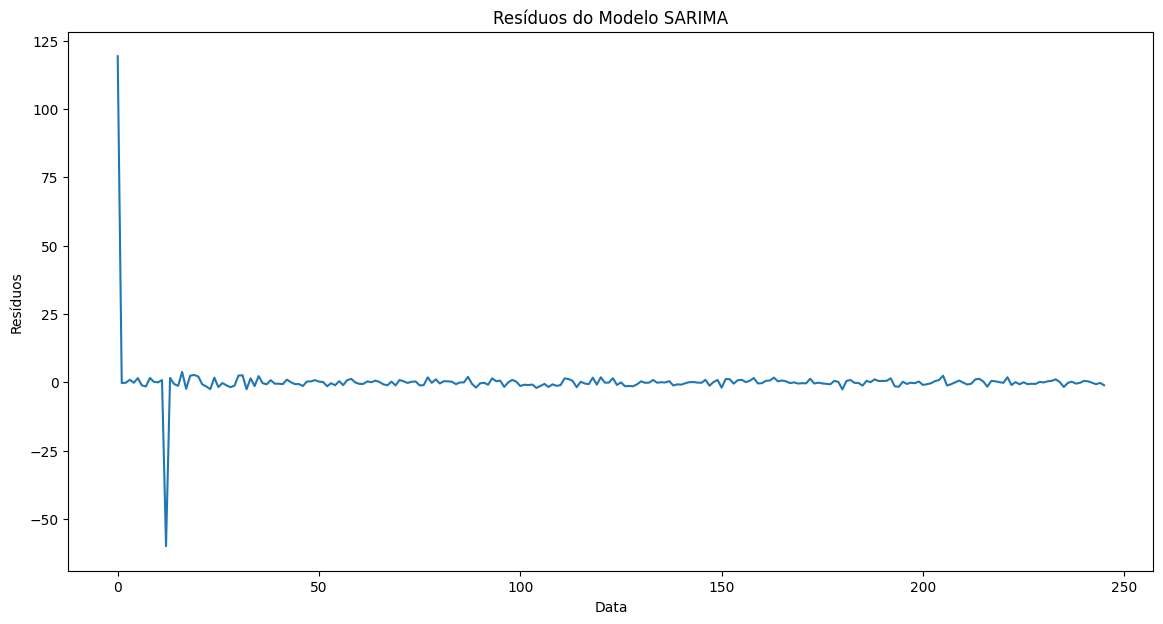

      lb_stat  lb_pvalue
15  42.527286   0.000186


In [108]:
# Resíduos do modelo SARIMA
resid_sarima = resultado_sarima.resid

# Plot dos resíduos
plt.figure(figsize=(14, 7))
plt.plot(resid_sarima)
plt.title("Resíduos do Modelo SARIMA")
plt.xlabel("Data")
plt.ylabel("Resíduos")
plt.show()

# Teste de Ljung-Box
lb_test_sarima = acorr_ljungbox(resid_sarima, lags=[15], return_df=True)
print(lb_test_sarima)

# **Previsão com o modelo SARIMA**

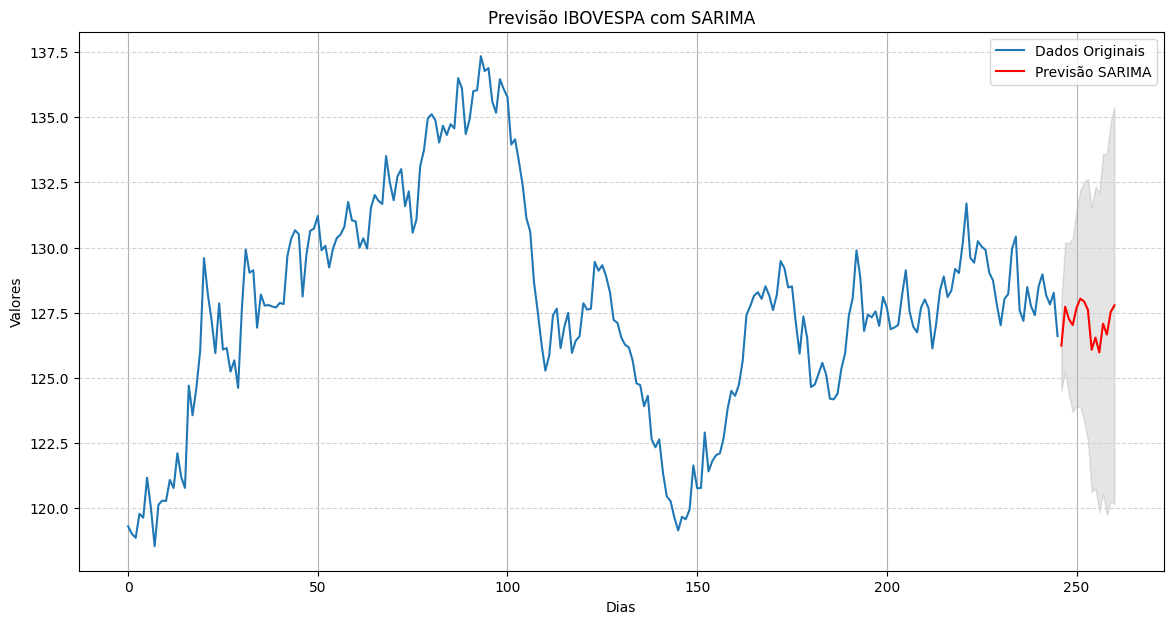

In [109]:
# Previsão dos próximos 15 dias
forecast_sarima = resultado_sarima.get_forecast(steps=15)
forecast_sarima_mean = forecast_sarima.predicted_mean
forecast_sarima_conf_int = forecast_sarima.conf_int()

# Plot das previsões
plt.figure(figsize=(14, 7))
plt.plot(dados["Último"], label="Dados Originais")
plt.plot(
    forecast_sarima_mean.index,
    forecast_sarima_mean,
    color="red",
    label="Previsão SARIMA",
)
plt.fill_between(
    forecast_sarima_conf_int.index,
    forecast_sarima_conf_int.iloc[:, 0],
    forecast_sarima_conf_int.iloc[:, 1],
    color="k",
    alpha=0.1,
)
plt.title("Previsão IBOVESPA com SARIMA")
plt.xlabel("Dias")
plt.ylabel("Valores")
plt.grid(axis = 'x')
plt.grid(axis = 'y', linestyle='--', color ='lightgray')
plt.legend()
plt.show()

**Divisão de treino e teste sarima**

In [110]:
# Divisão de treino e teste sarima.
train_data1 = dados["Último"][:-30]
test_data1 = dados["Último"][-30:]

In [111]:
# Modelo SARIMA com dados de treino
model_sarima_train = SARIMAX(train_data1, order=(p, d, q), seasonal_order=(1, 1, 0, s))
resultado_sarima_train = model_sarima_train.fit()
forecast_sarima_train = resultado_sarima_train.forecast(steps=30)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [112]:
mae_sarima = mean_absolute_error(test_data1, forecast_sarima_train)
print(f"MAE SARIMA: {mae_sarima}")

MAE SARIMA: 1.5718497871304966


In [113]:
rmse_sarima = mean_squared_error(test_data1, forecast_sarima_train)
print(f"RMSE SARIMA: {rmse_sarima}")

RMSE SARIMA: 3.293637428586797


In [114]:
mape_sarima = mean_absolute_percentage_error(test_data1, forecast_sarima_train) * 100
print(f"MAPE SARIMA: {mape_sarima}%")

MAPE SARIMA: 1.221136190067526%


In [115]:
def wmape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(y_true)

wmape_sarima = 100 * wmape(test_data, forecast_sarima_train)

print(f"WMAPE SARIMA: {wmape_sarima}%")

WMAPE SARIMA: 1.2992569727784222%


In [116]:

# gerando um dataframe com o resultado das métricas de erro para cada modelo
resultados1 = pd.DataFrame(
    {
        "Modelo": ["SARIMA"],
        "MAE": [mae_sarima],
        "RMSE": [rmse_sarima],
        "MAPE (%)": [mape_sarima],
        "WMAPE (%)": [wmape_sarima],
        'Accuracy (%)': [100- mape for mape in [mape_sarima]]
    }
).sort_values("MAPE (%)")

resultados1

,Modelo,MAE,RMSE,MAPE (%),WMAPE (%),Accuracy (%)
0,SARIMA,1.57185,3.293637,1.221136,1.299257,98.778864


# **Baseline Models**

In [117]:
# Definindo treino e teste
train_end = '2025-01-14'
dados_train = dados.loc[:train_end]
dados_test = dados.loc[train_end:]

In [118]:
dados_train.shape

(203, 8)

In [119]:
# Modelo Naive baseline
naive_pred = dados['Último'].shift(1)

from sklearn.metrics import mean_squared_error

mse_naive = mean_squared_error(dados['Último'][1:], naive_pred[1:])
print(f'Naive Baseline MSE: {mse_naive}')

Naive Baseline MSE: 1.0824646489795882


In [120]:
# Seasonal naive
seasonal_naive_pred = (
    dados['Último'].shift(15).fillna(method="ffill").fillna(method="bfill")
)

mse_seasonal_naive = mean_squared_error(dados['Último'][15:], seasonal_naive_pred[15:])
print(f'Seasonal Naive Baseline MSE: {mse_seasonal_naive}')

Seasonal Naive Baseline MSE: 16.374243831168826


<ipython-input-120-c3f792720cc0>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dados['Último'].shift(15).fillna(method="ffill").fillna(method="bfill")


# **XGBoost Regressor**

In [121]:
#escolhendo o número de legs, em nosso modelo.
n_lags = 15
for lag in range(1, n_lags + 1):
    dados[f'lag_{lag}'] = dados['Último'].shift(lag)

In [122]:
#escolhendo as variáveis preditoras.
predictors = [
    'Mínima',
    'Máxima',
    'Abertura'
]

In [123]:
dados_train.columns

Index(['Data', 'Último', 'Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%',
       'Último_diff'],
      dtype='object')

In [124]:
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit

X_train = dados_train[predictors]
y_train = dados_train['Último']
X_test = dados_test[predictors]
y_test = dados_test['Último']

tscv = TimeSeriesSplit(n_splits=3)
xgb = XGBRegressor(objective='reg:squarederror')

for train_idx, val_idx in tscv.split(X_train):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    xgb.fit(X_tr, y_tr)
    val_pred = xgb.predict(X_val)
    print(f'Validation MSE: {mean_squared_error(y_val, val_pred)}')


xgb_pred = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, xgb_pred)
print(f'XGBoost MSE: {mse_xgb}')

Validation MSE: 11.853628494289238
Validation MSE: 0.8566670248278796
Validation MSE: 0.3266347563440619
XGBoost MSE: 0.37587027906823073


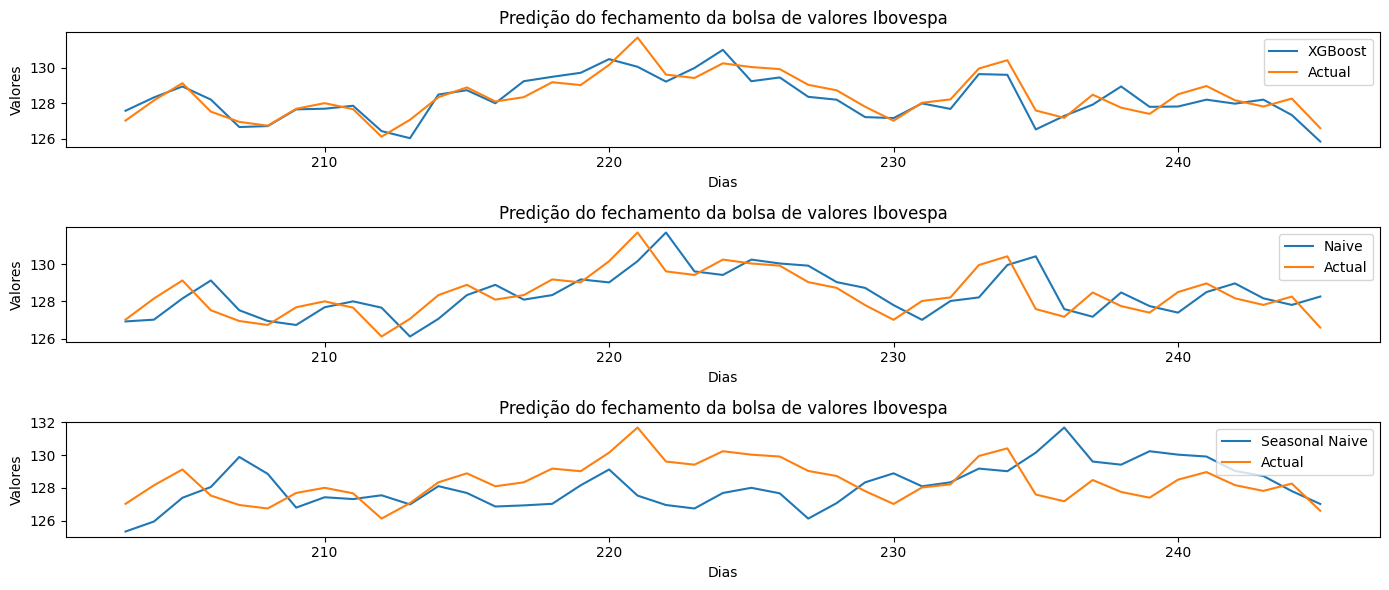

In [125]:
#Plotando nossos modelos XGBoost, Naive, Seasona Naive com nossos dados atuais e fazendo a comparação da nossa predição
import pandas as pd
idx = X_test.index
results = pd.DataFrame({
    'XGBoost': xgb_pred,
    'Naive': naive_pred.loc[idx],
    'Seasonal Naive': seasonal_naive_pred.loc[idx],
    'Actual': dados_test['Último'].loc[idx]
})

fig, ax = plt.subplots(3, 1, figsize=(14, 6))
for i, model in enumerate(['XGBoost', 'Naive', 'Seasonal Naive']):
    results[[model, "Actual"]].plot(ax=ax[i])
    ax[i].legend()
    ax[i].set_title('Predição do fechamento da bolsa de valores Ibovespa')
    ax[i].set_xlabel('Dias')
    ax[i].set_ylabel('Valores')
ax[0].get_figure().set_tight_layout(True)

# **MÉTRICAS DE VALIDAÇÃO**

In [126]:
#Fazendo a importação do erro médio absoluto
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

mae_xgb = mean_absolute_error(dados_test['Último'].loc[idx], xgb_pred)
rmse_xgb = mean_squared_error(dados_test['Último'].loc[idx], xgb_pred)
mape_xgb = 100* mean_absolute_percentage_error(dados_test['Último'].loc[idx], xgb_pred)

mae_naive = mean_absolute_error(dados_test['Último'].loc[idx], naive_pred.loc[idx])
rmse_naive = mean_squared_error(dados_test['Último'].loc[idx], naive_pred.loc[idx])
mape_naive = 100* mean_absolute_percentage_error(dados_test['Último'].loc[idx], naive_pred.loc[idx])

mae_seasonal_naive = mean_absolute_error(dados_test['Último'].loc[idx], seasonal_naive_pred.loc[idx])
rmse_seasonal_naive = mean_squared_error(dados_test['Último'].loc[idx], seasonal_naive_pred.loc[idx])
mape_seasonal_naive = 100* mean_absolute_percentage_error(dados_test['Último'].loc[idx], seasonal_naive_pred.loc[idx])


# gerando um dataframe com o resultado das métricas de erro para cada modelo
resultados = pd.DataFrame(
    {
        "Modelo": ["XGBoost", "Naive", "Arima", "Seasonal Naive", 'Sarima'],
        "MAE": [mae_xgb, mae_naive, mae_arima, mae_seasonal_naive, mae_sarima],
        "RMSE": [rmse_xgb, rmse_naive, rmse_arima, rmse_seasonal_naive, rmse_sarima],
        "MAPE (%)": [mape_xgb, mape_naive, mape_sarima, mape_seasonal_naive, mape_sarima],
        'Accuracy (%)': [100- mape for mape in [mape_xgb, mape_naive, mape_arima, mape_seasonal_naive, mape_sarima]],
    }
).sort_values("MAPE (%)")
resultados = resultados.sort_index()

resultados

,Modelo,MAE,RMSE,MAPE (%),Accuracy (%)
0,XGBoost,0.503684,0.375870,0.391518,99.608482
1,Naive,0.821884,1.019631,0.640153,99.359847
2,Arima,1.465767,2.987185,1.221136,98.860842
3,Seasonal Naive,1.538349,3.437433,1.196523,98.803477
4,Sarima,1.571850,3.293637,1.221136,98.778864


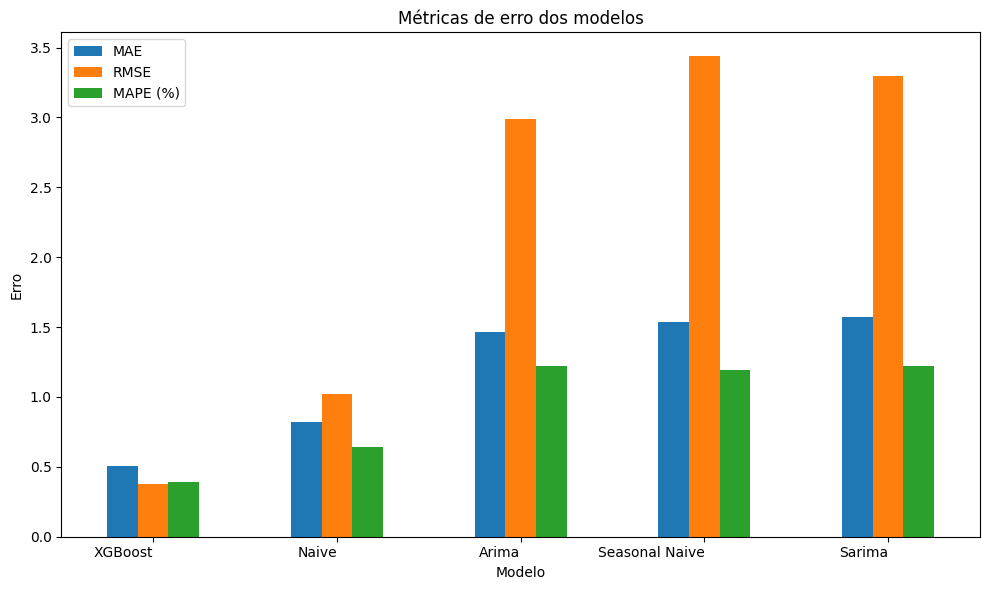

In [127]:
ax = resultados.plot(kind='bar', y=['MAE', 'RMSE', 'MAPE (%)'], x='Modelo', figsize=(10,6))
# rotacionando os labels do eixo x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')
ax.set_title('Métricas de erro dos modelos')
ax.set_ylabel('Erro')
ax.get_figure().set_tight_layout(True)

# **Conclusão**

  O melhor Modelo de previsão foi o XGBoost com uma accuracy de: 99.60%, com um MAE:0.50,  RMSE:0.37 e um MAPE (%): 0.39, este modelo previu o fechamento diario da bolsa para os próximos 15 dias na casa dos 128 mil, descendo até uma faixa de 126 mil pontos. Lembrando que, nosso erro absoluto médio foi baixo comparado aos outros modelos testados, um aumento no erro poderia ocasionar, um prejuizo alto na hora do investimento, já que estamos tratando da bolsa de valores.